# Assignment 3 - MLA 5&6 weeks

## Lecture 5: Random Forest, Gradient Boosting, XGBoost, and Model Evaluation
### Task 1: Random Forest Classification

Objective: Implement a Random Forest classifier, perform hyperparameter tuning, and evaluate
the model.

In [240]:
# 1. Load a classification dataset.

In [241]:
import pandas as pd

In [242]:
df = pd.read_csv("../../data/as3/Student_performance_data _.csv")

In [243]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [244]:
# 2. Split the dataset into training and testing sets.

In [245]:
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

In [246]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
# 3. Implement a Random Forest Classifier and perform hyperparameter tuning
# using GridSearchCV.
# ○ Tune parameters such as n_estimators, max_depth, and criterion.

In [248]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [249]:
baseline_accuracy = clf.score(X_test, y_test)

print(f'Baseline Model Accuracy: {baseline_accuracy}')

Baseline Model Accuracy: 0.9192200557103064


In [250]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [251]:
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best score: 0.9223397980159085


In [252]:
# 4. Evaluate the best model using metrics like accuracy, precision, and recall.

In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

y_pred = clf.best_estimator_.predict(X_test)

# 1. Calculate Accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_accuracy:.4f}')

# 2. Calculate Precision
rf_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {rf_precision:.4f}')

# 3. Calculate Recall
rf_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {rf_recall:.4f}')

# 4. Generate a classification report (includes precision, recall, and F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9081
Precision: 0.9113
Recall: 0.9081

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.42      0.60        33
         1.0       0.80      0.88      0.83        80
         2.0       0.89      0.88      0.88       121
         3.0       0.87      0.89      0.88       127
         4.0       0.95      0.98      0.96       357

    accuracy                           0.91       718
   macro avg       0.90      0.81      0.83       718
weighted avg       0.91      0.91      0.90       718



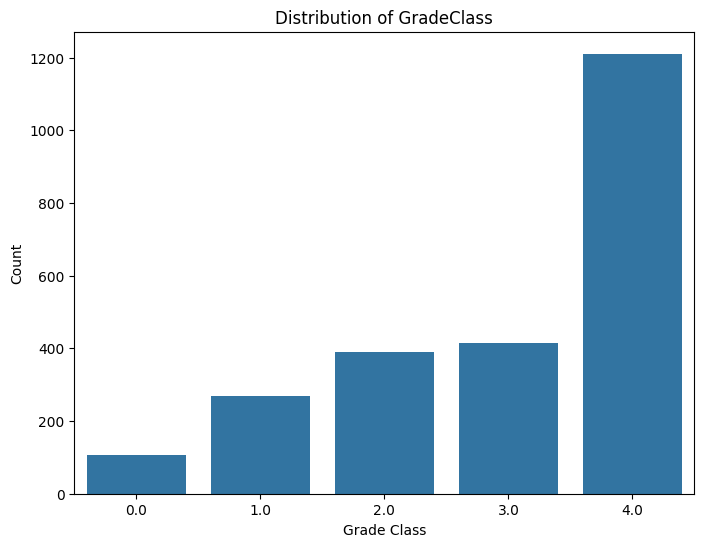

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='GradeClass', data=df)
plt.title('Distribution of GradeClass')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()

### Task 2: Gradient Boosting

Objective: Implement Gradient Boosting for a regression problem and evaluate using
cross-validation.

1. Load a regression dataset.
2. Implement GradientBoostingRegressor and evaluate it using 5-fold cross-validation.
m3. Report the mean squared error (MSE) and R² scores for each fold.

In [255]:
df = pd.read_csv("../../data/as3/Student_Marks.csv")
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [256]:
X = df[['time_study', 'number_courses']]
y = df['Marks']

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(random_state=42)

mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -mse_scores 

r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print("Mean Squared Error (MSE) for each fold:", mse_scores)
print("R² scores for each fold:", r2_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average R²:", np.mean(r2_scores))

Mean Squared Error (MSE) for each fold: [1.29432764 4.6007462  0.91698978 1.00533428 1.24722833]
R² scores for each fold: [0.99335372 0.97661158 0.99631415 0.99355974 0.99318176]
Average MSE: 1.812925245217413
Average R²: 0.9906041897183238


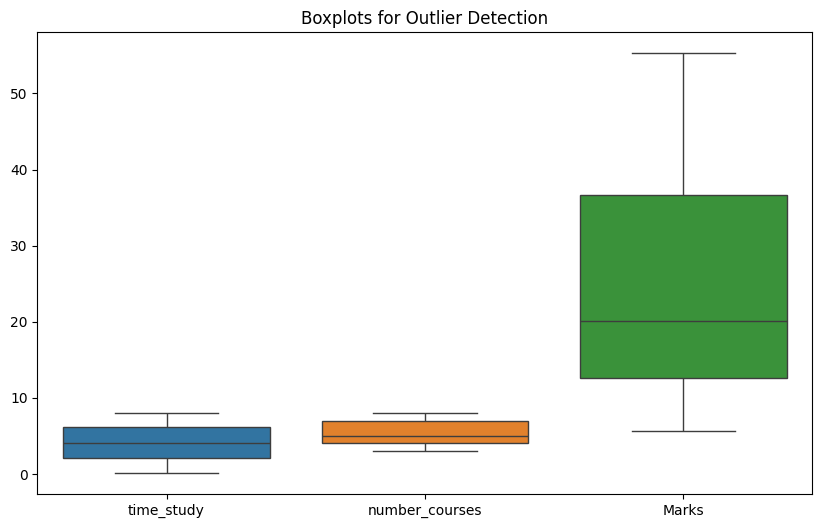

In [257]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['time_study', 'number_courses', 'Marks']])
plt.title("Boxplots for Outlier Detection")
plt.show()

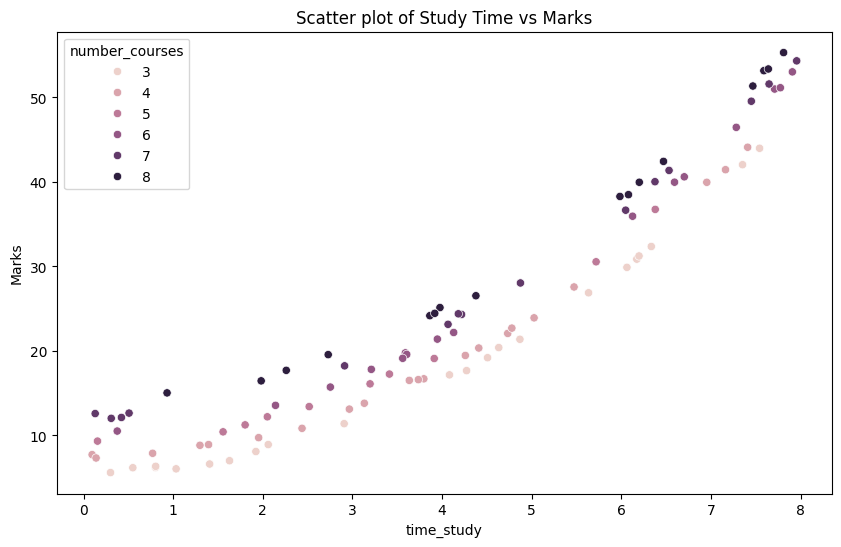

In [258]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time_study', y='Marks', hue='number_courses')
plt.title("Scatter plot of Study Time vs Marks")
plt.show()

In [259]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [260]:
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", test_mse)
print("Test R² Score:", test_r2)

Test Mean Squared Error: 1.4866795645682334
Test R² Score: 0.9933921246451279


### Task 3: XGBoost Classification

Objective: Implement XGBoost for classification and compare it with the Random Forest model.

1. Load the same dataset from Task 1.
2. Implement an XGBoost Classifier.
3. Evaluate the performance of the XGBoost model and compare it with the Random Forest
model in Task 1, using accuracy, precision, and recall.

In [261]:
df = pd.read_csv("../../data/as3/Student_performance_data _.csv")

X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [262]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and performance metrics for Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(classification_report(y_test, rf_predictions))

Random Forest Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
              precision    recall  f1-score   support

         0.0       0.94      0.48      0.64        33
         1.0       0.81      0.90      0.85        80
         2.0       0.92      0.90      0.91       121
         3.0       0.90      0.90      0.90       127
         4.0       0.95      0.98      0.97       357

    accuracy                           0.92       718
   macro avg       0.90      0.83      0.85       718
weighted avg       0.92      0.92      0.92       718



In [263]:
import xgboost as xgb

# XGBoost Classifier
xg_model = xgb.XGBClassifier(eval_metric='mlogloss')
xg_model.fit(X_train, y_train)

# Predictions and performance metrics for XGBoost
xg_predictions = xg_model.predict(X_test)
xg_accuracy = accuracy_score(y_test, xg_predictions)
xg_precision = precision_score(y_test, xg_predictions, average='weighted')
xg_recall = recall_score(y_test, xg_predictions, average='weighted')

print("\nXGBoost Performance:")
print(f"Accuracy: {xg_accuracy:.2f}")
print(f"Precision: {xg_precision:.2f}")
print(f"Recall: {xg_recall:.2f}")
print(classification_report(y_test, xg_predictions))


XGBoost Performance:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        33
         1.0       0.79      0.86      0.83        80
         2.0       0.90      0.91      0.91       121
         3.0       0.90      0.90      0.90       127
         4.0       0.96      0.96      0.96       357

    accuracy                           0.91       718
   macro avg       0.86      0.84      0.85       718
weighted avg       0.91      0.91      0.91       718



In [264]:
# Compare performance
print("\nPerformance Comparison:")
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}")
print(f"XGBoost - Accuracy: {xg_accuracy:.2f}, Precision: {xg_precision:.2f}, Recall: {xg_recall:.2f}")


Performance Comparison:
Random Forest - Accuracy: 0.92, Precision: 0.92, Recall: 0.92
XGBoost - Accuracy: 0.91, Precision: 0.91, Recall: 0.91


### Task 4: Model Evaluation Metrics
Objective: Understand model evaluation metrics.
1. Define and explain the metrics: accuracy, precision, recall, F1-score, and ROC AUC.
2. For Task 1 (Random Forest), compute the ROC (Receiver Operating Characteristic)
curve(plot) and AUC (Area Under Curve) score for binary classification.

#### task 1:

- **Accuracy**: The proportion of correct predictions out of all predictions made. It’s calculated as:
    - **Accuracy** = (True Positives (TP) + True Negatives) / ((TN)Total Predictions (TP + TN + FP + FN))
    - **Pros**: Simple to calculate.
    - **Cons**: Can be misleading when the data is imbalanced (e.g., 95% of one class).

- **Precision**: The proportion of true positive predictions out of all positive predictions made by the model. It measures how accurate the positive predictions are.
    - **Precision** = (True Positives (TP)) / (True Positives (TP) + False Positives (FP))
    - **Pros**: Focuses on the correctness of positive predictions.
    - **Cons**: Can be affected by the cl

- **Recall** (Sensitivity or True Positive Rate): The proportion of true positives correctly predicted out of all actual positives in the dataset.
    - **Recall** = (True Positives (TP)) / (True Positives (TP) + False Negatives (FN))
    - **Pros**: Important when minimizing false negatives is critical (e.g., in medical diagnosis).
    - **Cons**: It doesn't consider false positives.

- **F1-score**: The harmonic mean of precision and recall. It balances precision and recall, especially when you have an imbalanced dataset.
    - **F1-score** = 2 × ((Precision × Recall) / (Precision + Recall))
    - **Pros**: Provides a single metric that balances both precision and recall.
    - **Cons**: Not as interpretable as precision or recall alone.

- **ROC AUC** (Receiver Operating Characteristic - Area Under Curve):
    - **The ROC curve** is a plot that shows the trade-off between true positive rate (Recall) and false positive rate across different thresholds.
    - **AUC** measures the area under the ROC curve. A perfect model would have an AUC of 1, and a model with no discriminatory power would have an AUC of 0.5.
    - **Pros**: AUC is great for evaluating classification models as it measures the model's ability to distinguish between classes across all possible thresholds.
    - **Cons**: Doesn't provide specific information on precision and reca

In [265]:
df = pd.read_csv("../../data/as3/Student_performance_data _.csv")

X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [266]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = len(np.unique(y_test))  # Number of unique classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarize labels

# Predict probabilities for all classes
y_scores = clf.predict_proba(X_test)
y_scores

array([[0.  , 0.04, 0.02, 0.  , 0.94],
       [0.12, 0.57, 0.22, 0.07, 0.02],
       [0.07, 0.16, 0.16, 0.43, 0.18],
       ...,
       [0.  , 0.  , 0.  , 0.01, 0.99],
       [0.  , 0.07, 0.81, 0.11, 0.01],
       [0.01, 0.07, 0.04, 0.06, 0.82]])

AUC for class 0: 0.96
AUC for class 1: 0.98
AUC for class 2: 0.98
AUC for class 3: 0.98
AUC for class 4: 1.00


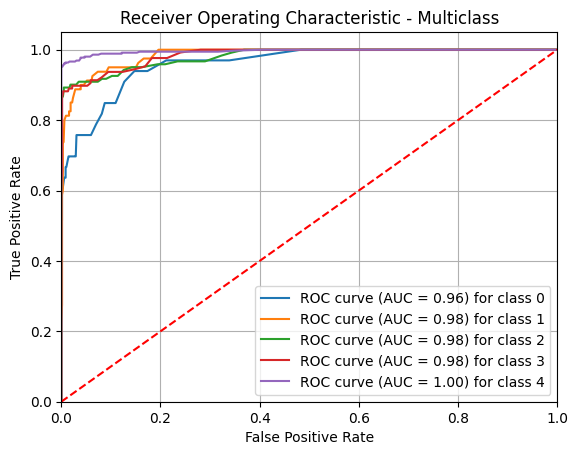

In [267]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC for each class
for i in range(n_classes):
    print(f'AUC for class {i}: {roc_auc[i]:.2f}')

# Plotting the ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Lecture 6: K-Means Clustering and DBSCAN
### Task 5: K-Means Clustering

Objective: Implement K-Means clustering and evaluate using the Elbow Method and Silhouette
Score.

1. Load a dataset (excluding the target labels).
2. Apply K-Means Clustering with varying numbers of clusters (K=2 to K=10 for example).
3. Plot the Elbow curve to find the optimal number of clusters.
4. Compute the Silhouette Score for the optimal K.

In [268]:
df = pd.read_csv("../../data/as3/Student_performance_data _.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [269]:
X_scaled = df.drop('GradeClass', axis=1)

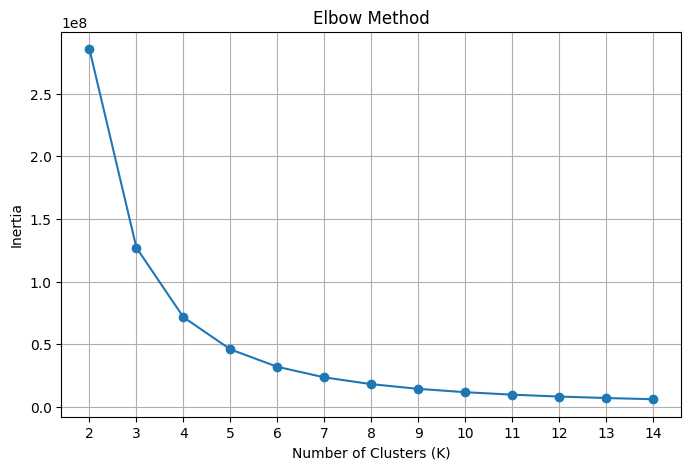

In [270]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

In [277]:
### from sklearn.metrics import silhouette_score

optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans_optimal.fit_predict(X_scaled)

# Compute Silhouette Score
silhouette_avg_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg_kmeans:.2f}')

Silhouette Score for K=4: 0.65


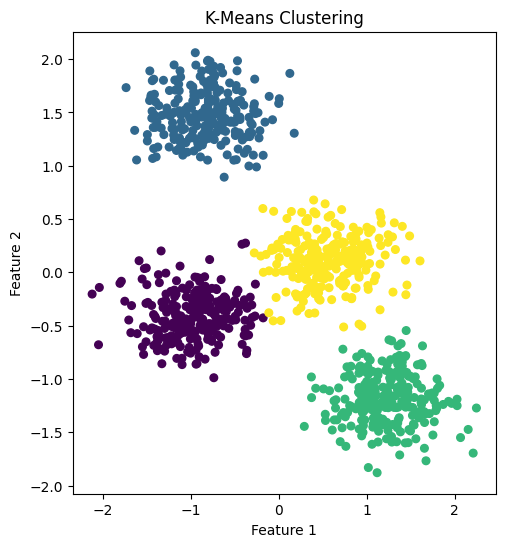

In [279]:
plt.figure(figsize=(12, 6))
# K-Means clustering result
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

### Task 6: DBSCAN Clustering

Objective: Implement DBSCAN for clustering and compare it with K-Means.

1. Load the same dataset used in Task 5.
2. Implement DBSCAN and tune its hyperparameters (eps and min_samples).
3. Compare the clusters generated by DBSCAN with the clusters from K-Means.
Discuss the differences.

In [280]:
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

X_scaled = StandardScaler().fit_transform(X)

eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [5, 10, 15]

best_dbscan_score = -1
best_eps = None
best_min_samples = None
dbscan_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        
        # Calculate silhouette score (ignore noise points labeled as -1)
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(X_scaled, labels)
            print(f"DBSCAN: eps={eps}, min_samples={min_samples}, Silhouette Score={score}")
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_eps = eps
                best_min_samples = min_samples
                dbscan_labels = labels

print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}, Score={best_dbscan_score}")

DBSCAN: eps=0.1, min_samples=5, Silhouette Score=0.030836548808849503
DBSCAN: eps=0.1, min_samples=10, Silhouette Score=-0.060276744706969795
DBSCAN: eps=0.1, min_samples=15, Silhouette Score=-0.2519214636130347
DBSCAN: eps=0.2, min_samples=5, Silhouette Score=0.5155003497558446
DBSCAN: eps=0.2, min_samples=10, Silhouette Score=0.6223507024475657
DBSCAN: eps=0.2, min_samples=15, Silhouette Score=0.599571905939998
DBSCAN: eps=0.3, min_samples=5, Silhouette Score=0.3740899284127104
DBSCAN: eps=0.3, min_samples=10, Silhouette Score=0.4178110964413571
DBSCAN: eps=0.3, min_samples=15, Silhouette Score=0.5278756364732421
DBSCAN: eps=0.4, min_samples=15, Silhouette Score=0.2842545892978758
Best DBSCAN parameters: eps=0.2, min_samples=10, Score=0.6223507024475657


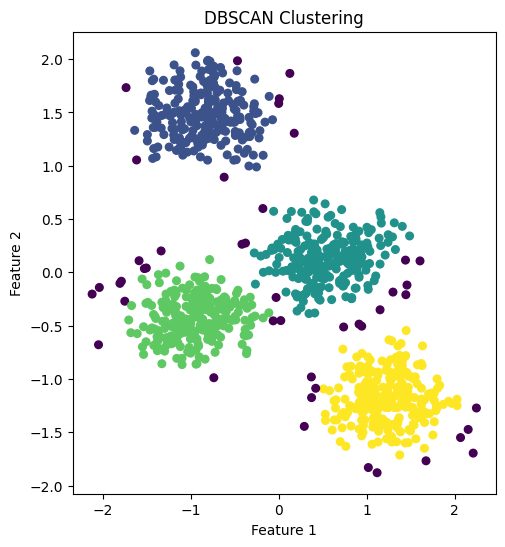

Number of clusters identified by DBSCAN: 4
Number of clusters identified by K-Means: 4


In [275]:
plt.figure(figsize=(12, 6))

# DBSCAN clustering result
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# Step 4: Compare the Clusters
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_clusters_kmeans = len(set(y_kmeans))

print(f"Number of clusters identified by DBSCAN: {n_clusters_dbscan}")
print(f"Number of clusters identified by K-Means: {n_clusters_kmeans}")

### Task 7: Clustering Evaluation

Objective: Evaluate the clustering quality using appropriate metrics.

1. Explain the Silhouette Score and how it is used to evaluate clustering.
2. Compare the Silhouette Score for the K-Means and DBSCAN clusters from Tasks 5 and 6.


P.S Please be prepared to explain your code/solution/answers.

**The Silhouette Score** is a measure of how similar a data point is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering by analyzing both cohesion (how close points in a cluster are to each other) and separation (how far clusters are from one another).

For each point i, the Silhouette Score is calculated as:

S(i) = (b(i) - a(i)) / max(a(i), b(i))

Where:

- a(i): The average distance between the point i and all other points within its own cluster.
- b(i): The average distance between the point i and all points in the nearest neighboring cluster (the next best cluster).

In [281]:
print(f'Silhouette Score for K-Means (K={optimal_k}): {silhouette_avg_kmeans:.2f}')

best_eps = 0.2
best_min_samples = 10
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter out noise points (-1) for Silhouette Score calculation
filtered_dbscan_labels = dbscan_labels[dbscan_labels != -1]
filtered_X_scaled = X_scaled[dbscan_labels != -1]

if len(set(filtered_dbscan_labels)) > 1:  # More than 1 cluster
    silhouette_avg_dbscan = silhouette_score(filtered_X_scaled, filtered_dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.2f}')
else:
    silhouette_avg_dbscan = -1  # Meaningful clustering did not happen
    print("DBSCAN did not form meaningful clusters.")


Silhouette Score for K-Means (K=4): 0.65
Silhouette Score for DBSCAN: 0.68
